<a href="https://colab.research.google.com/github/noemigarcia27/SImulacion-II/blob/main/Movimiento_browniano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movimiento Browniano**

Un proceso estocástico $ W(t) $ para $ t \in [0,1] $ es llamado movimiento browniano, o proceso estádar de Wiener, sobre $ [0,T] $ si satisface las sigueintes condiciones:

* $ W(0) = 0 $
* Para $ 0 ≤ s \le t \le T $, la variable aleatoria dada por el incremento $ W(t) - W(s) $ es $ N(0,t-s) $; equivalentemente $ W(t) - W(s) \thicksim \sqrt{t-s} * N(0,1) $
* Para $ 0 ≤ s \le t \le u \le v \le T $, los moviemioentos $ W(t) - W(s) $ y $ W(u) - W(v) $ son independientes

Estas condiciones se pueden escribir así:
$$ W_{i+1} = W_i + \delta W_i, \quad i=0,1,2,...,L-1 $$

si $ \delta t = \frac{T}{L} $, para un entero positivo $L$
$$ \delta W_i \thicksim \sqrt{\delta t} N(0,1) $$



Las librerias que vamos a ocupar son las siguientes

In [35]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

Párametros
Para este ejercicio vamos a tomar [0,1] y L=500

In [36]:
T = 1
L = 500
St = T / L

Inicialización y el codigo para que funcione

In [37]:
W = np.zeros(L)

for i in range(0, L-1):
  xi = rd.gauss(0,1)
  W[i+1] = W[i] + np.sqrt(St) * xi

Grafica

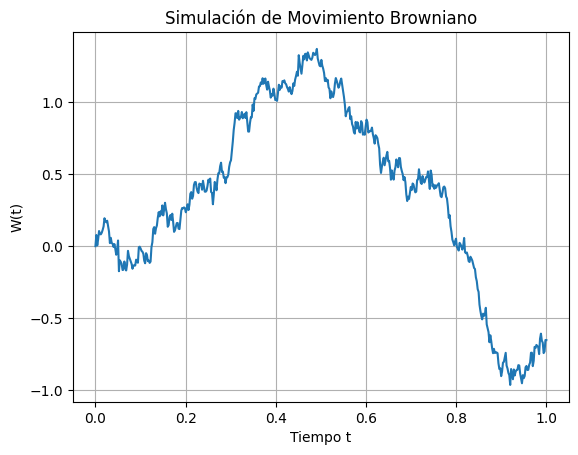

In [42]:
t = np.linspace(0, T, L)
plt.plot(t, W)
plt.title("Simulación de Movimiento Browniano")
plt.xlabel("Tiempo t")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

Podemos observar que es una caminata aleatoria como lo que ya conocemos.


Ahora lo tenemos que hacer para varias trayectorias, tomamos N = 500 (El numero de trayectorias)

/tmp/ipython-input-3816234165.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


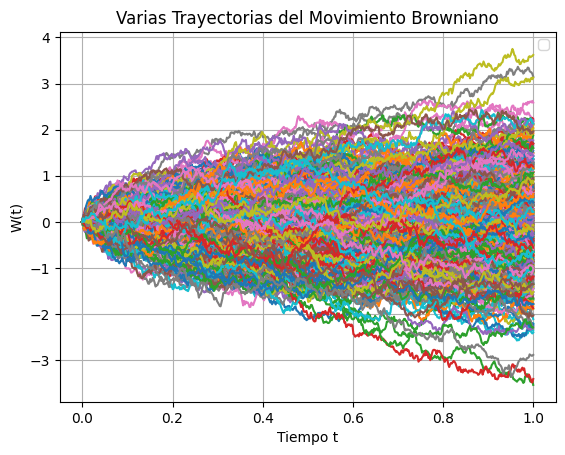

In [39]:
N = 500
t = np.linspace(0,T,L)

for j in range(N):
  W = np.zeros(L)
  for i in range(0, L-1):
    xi = rd.gauss(0,1)
    W[i+1] = W[i] + np.sqrt(St) * xi

  plt.plot(t, W)

plt.title("Varias Trayectorias del Movimiento Browniano")
plt.xlabel("Tiempo t")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()
plt.show()

Ahora, lo que podemos hacer es un refinamiento, es decir duplicar el numero de puntos sin que se pierdan los puntos que ya tenemos.

Def:
$$ t_{ i + \frac{1}{2} } := \frac{1}{2} (t_{i} + t_{i+1}) $$

Para el refinamiento, hacer

$$ W_{i + \frac{1}{2}} = \frac{1}{2} ( W_{i} + W_{i+1} ) + \frac{1}{2} \sqrt{\delta t} ξ_i, \quad ξ_i \thicksim N(0,1) $$

In [40]:
W_ref = np.zeros((2*L)-1)

W_ref[0::2] = W  # 0, 2, 4, ..., 2L

for i in range(L-1):
  xi = rd.gauss(0,1)
  W_med = 0.5*(W[i] + W[i+1]) + 0.5*np.sqrt(St)*xi

  W_ref[2*i + 1] = W_med

Gráfica

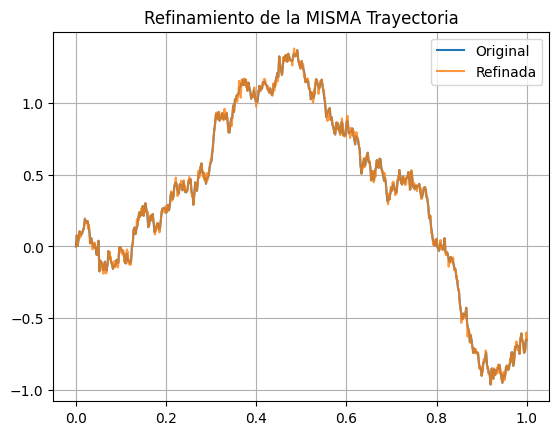

In [41]:
t_ref = np.linspace(0, T, 2*L - 1)

# Graficamos
plt.plot(t, W, label="Original")
plt.plot(t_ref, W_ref, label="Refinada", alpha=0.8)
plt.title("Refinamiento de la MISMA Trayectoria")
plt.grid(True)
plt.legend()
plt.show()